In [89]:
import matplotlib.pyplot as plt
import numpy as np

In [98]:
import shutil
shutil.unpack_archive('outputs saves.zip','./saves1','zip')
shutil.unpack_archive('outputs saves 2.zip','./saves2','zip')
shutil.unpack_archive('outputs saves 3.zip','./saves3','zip')

In [137]:
import os
# assign directory
directory = 'saves1'


running_loss = [[],[]]
train_accuracy = [[],[]]
test_accuracy = [[],[]]
train_loss = [[],[]]
test_loss = [[],[]]
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if 'running_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          running_loss[0].append(loss.tolist())
          running_loss[1].append(float(bound))
        elif 'train_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_accuracy[0].append(loss.tolist())
          train_accuracy[1].append(float(bound))
        elif 'test_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_accuracy[0].append(loss.tolist())
          test_accuracy[1].append(float(bound))
        elif 'train_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_loss[0].append(loss.tolist())
          train_loss[1].append(float(bound))
        elif 'test_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_loss[0].append(loss.tolist())
          test_loss[1].append(float(bound))

In [138]:
# Gains : {0.01,0.1,1/sqrt(6),1/sqrt(3),1,sqrt(3),sqrt(6),10,100}
for i,gain in enumerate(test_accuracy[1]):
  print(gain,f" : {max(test_accuracy[0][i]):.3f}")
for i,gain in enumerate(test_loss[1]):
    print(gain,f" : {min(test_loss[0][i]):.3f}")

1.0  : 0.802
1.732  : 0.802
0.408  : 0.784
0.1  : 0.776
100.0  : 0.392
2.449  : 0.789
10.0  : 0.415
0.577  : 0.790
0.01  : 0.100
10.0  : 2.539
2.449  : 0.666
1.732  : 0.649
0.408  : 0.713
0.1  : 0.766
1.0  : 0.653
0.577  : 0.713
0.01  : 2.303
100.0  : 8393224230.400


In [139]:
def print_res(metric,mode=min):
  label = np.array(metric[1])
  points = np.array(metric[0])
  idx = np.argsort(label)
  label = label[idx]
  points = points[idx]

  for i in range(len(label)):
    print("label ", label[i])
    print(f"{mode(points[i]):.3f}")



In [140]:
print_res(test_loss,mode=min)
print_res(test_accuracy,mode=max)

label  0.01
2.303
label  0.1
0.766
label  0.408
0.713
label  0.577
0.713
label  1.0
0.653
label  1.732
0.649
label  2.449
0.666
label  10.0
2.539
label  100.0
8393224230.400
label  0.01
0.100
label  0.1
0.776
label  0.408
0.784
label  0.577
0.790
label  1.0
0.802
label  1.732
0.802
label  2.449
0.789
label  10.0
0.415
label  100.0
0.392


In [129]:
import math
1/math.sqrt(3)

0.5773502691896258

In [134]:
def harry(metric,title):
  # plotter
  label = np.array(metric[1])
  points = np.array(metric[0])
  idx = np.argsort(label)
  label = label[idx]
  points = points[idx]
  points = points.T
  f, axarr = plt.subplots(1,2,figsize = (14,4))
  for i in range(2):
    axarr[i].plot(points,label=label)
  if "Loss" in title:
    axarr[1].set_ylim([0, 1.5])
  elif "Accuracy" in title:
    axarr[0].set_ylim([0,1])
    axarr[1].set_ylim([0.5, 1])
  plt.xlabel('epoch')
  plt.ylabel('value')
  axarr[0].legend()
  axarr[1].legend()
  fig = plt.gcf()
  fig.suptitle(title, fontsize=14)

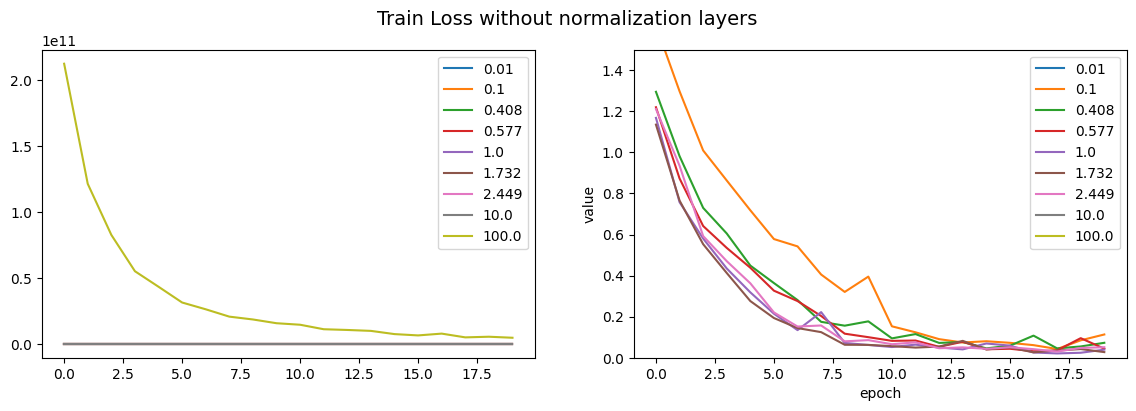

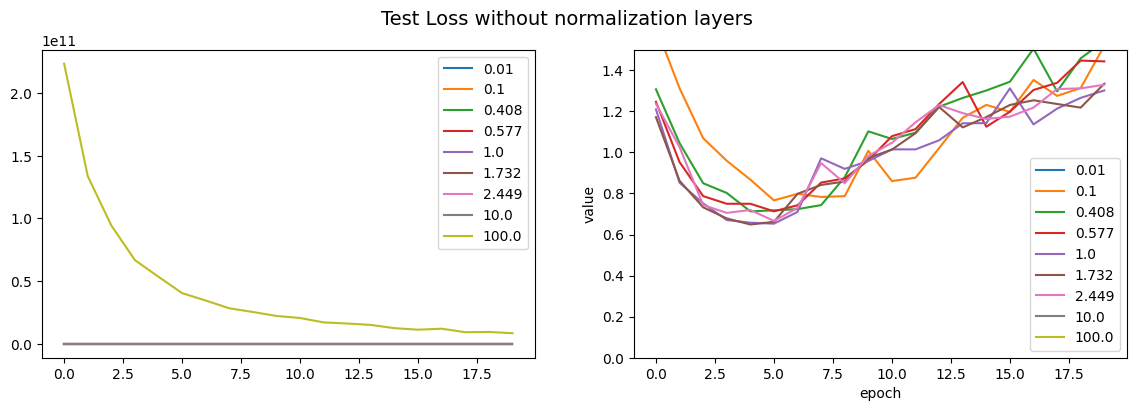

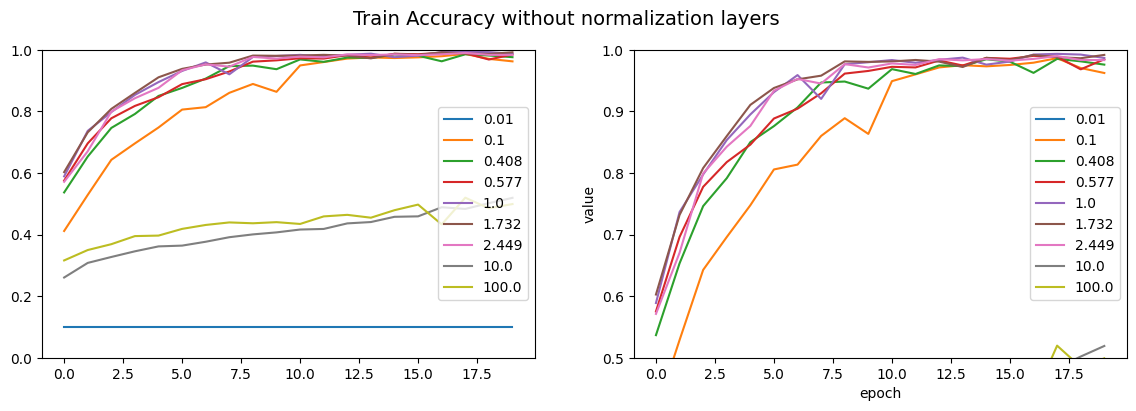

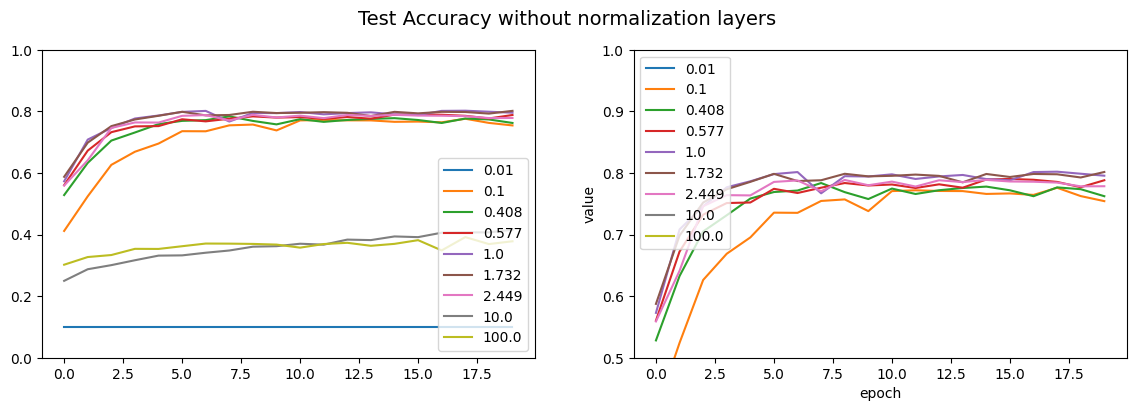

In [93]:
#harry(running_loss,"Running Loss without normalization layers")
harry(train_loss,"Train Loss without normalization layers")
harry(test_loss,"Test Loss without normalization layers")
harry(train_accuracy,"Train Accuracy without normalization layers")
harry(test_accuracy,"Test Accuracy without normalization layers")


In [94]:
#############
## ADDING NORMALIZATION LAYERS
#############

In [141]:
import os
# assign directory
directory = 'saves2'


running_loss = [[],[]]
train_accuracy = [[],[]]
test_accuracy = [[],[]]
train_loss = [[],[]]
test_loss = [[],[]]
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if 'running_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          running_loss[0].append(loss.tolist())
          running_loss[1].append(float(bound))
        elif 'train_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_accuracy[0].append(loss.tolist())
          train_accuracy[1].append(float(bound))
        elif 'test_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_accuracy[0].append(loss.tolist())
          test_accuracy[1].append(float(bound))
        elif 'train_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_loss[0].append(loss.tolist())
          train_loss[1].append(float(bound))
        elif 'test_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_loss[0].append(loss.tolist())
          test_loss[1].append(float(bound))

In [142]:
print_res(test_loss,mode=min)
print_res(test_accuracy,mode=max)

label  0.01
0.513
label  0.1
0.509
label  0.408
0.458
label  0.577
0.477
label  1.0
0.465
label  1.732
0.497
label  2.449
0.519
label  10.0
0.733
label  100.0
0.962
label  0.01
0.855
label  0.1
0.870
label  0.408
0.866
label  0.577
0.871
label  1.0
0.885
label  1.732
0.878
label  2.449
0.861
label  10.0
0.802
label  100.0
0.695


In [96]:
def harry2(metric,title):
  # plotter
  label = np.array(metric[1])
  points = np.array(metric[0])
  idx = np.argsort(label)
  label = label[idx]
  points = points[idx]
  points = points.T
  f, axarr = plt.subplots(1,1,figsize = (8,4))
  for i in range(1):
    axarr.plot(points,label=label)
  plt.xlabel('epoch')
  plt.ylabel('value')
  axarr.legend()  
  fig = plt.gcf()
  fig.suptitle(title, fontsize=14)

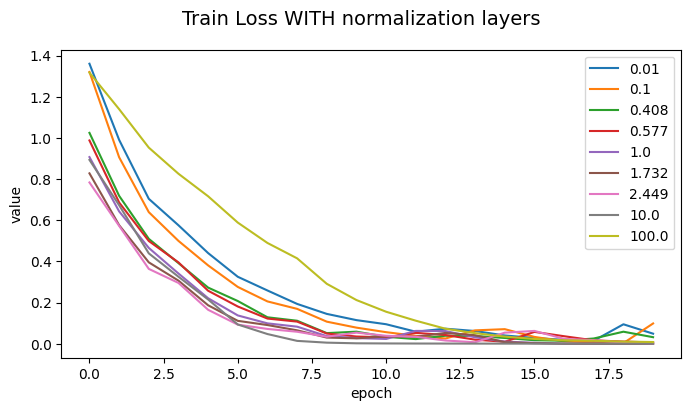

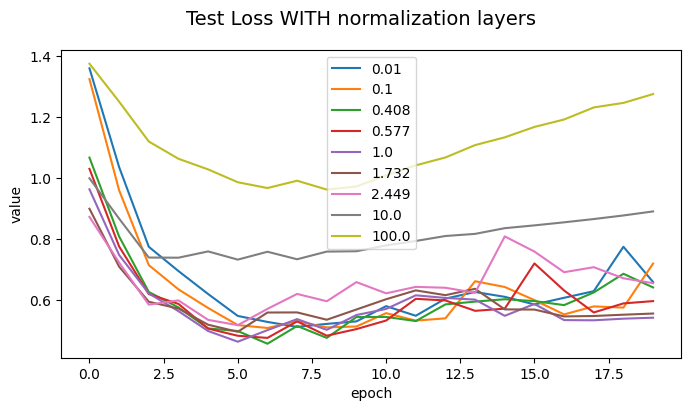

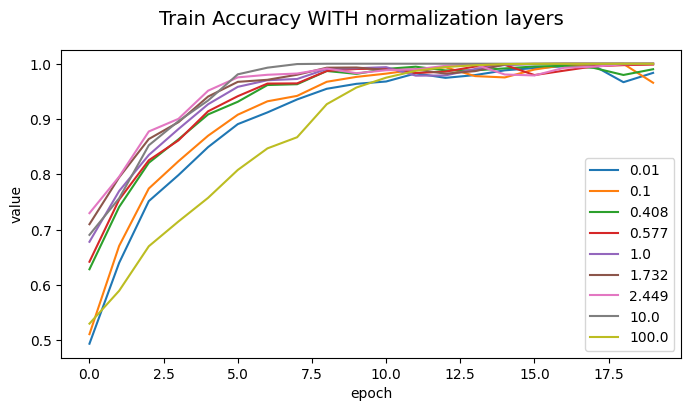

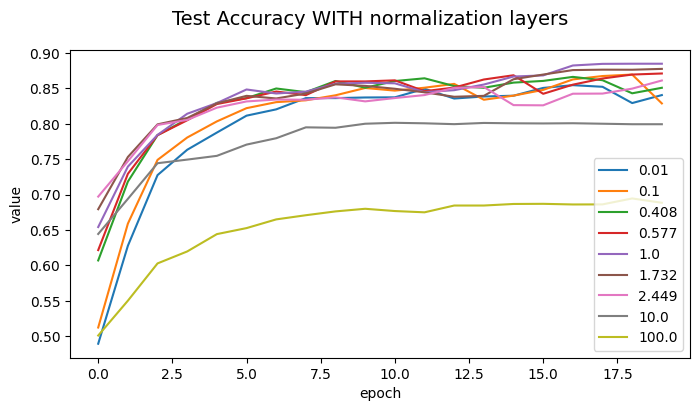

In [97]:
#harry(running_loss,"Running Loss WITH normalization layers")
harry2(train_loss,"Train Loss WITH normalization layers")
harry2(test_loss,"Test Loss WITH normalization layers")
harry2(train_accuracy,"Train Accuracy WITH normalization layers")
harry2(test_accuracy,"Test Accuracy WITH normalization layers")


In [149]:
import os
# assign directory
directory = 'saves3'


running_loss = [[],[]]
train_accuracy = [[],[]]
test_accuracy = [[],[]]
train_loss = [[],[]]
test_loss = [[],[]]
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        

        if 'running_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          running_loss[0].append(loss.tolist())
          running_loss[1].append(bound)
        elif 'train_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_accuracy[0].append(loss.tolist())
          train_accuracy[1].append(bound)
        elif 'test_accuracy' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_accuracy[0].append(loss.tolist())
          test_accuracy[1].append(bound)
        elif 'train_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          train_loss[0].append(loss.tolist())
          train_loss[1].append(bound)
        elif 'test_loss' in f:
          loss = np.load(f)
          bound = f.split("_")[-1][:-4]
          test_loss[0].append(loss.tolist())
          test_loss[1].append(bound)

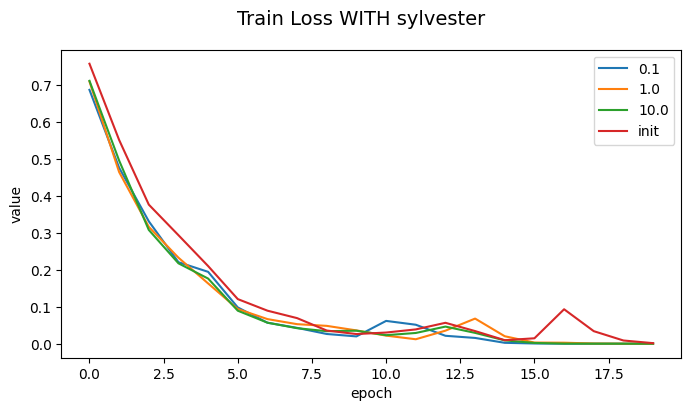

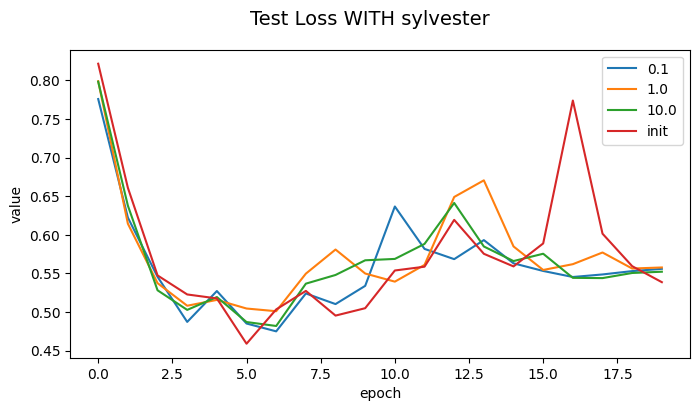

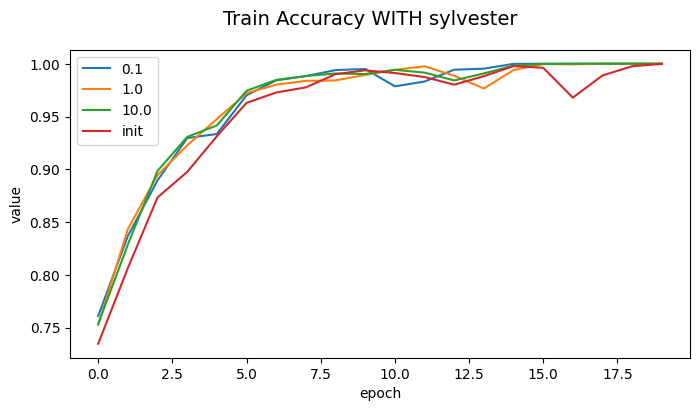

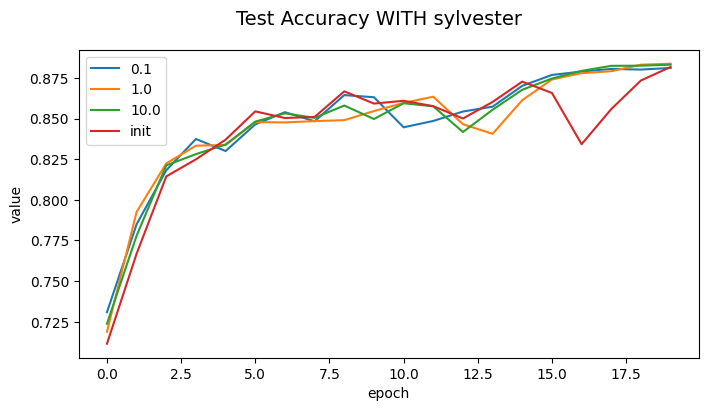

In [150]:
harry2(train_loss,"Train Loss WITH sylvester")
harry2(test_loss,"Test Loss WITH sylvester")
harry2(train_accuracy,"Train Accuracy WITH sylvester")
harry2(test_accuracy,"Test Accuracy WITH sylvester")

In [151]:
print_res(test_loss,mode=min)
print_res(test_accuracy,mode=max)

label  0.1
0.475
label  1.0
0.501
label  10.0
0.482
label  init
0.459
label  0.1
0.881
label  1.0
0.884
label  10.0
0.883
label  init
0.882
